## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
EarlyStop = [5, 10, 25]

In [9]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
"""
# 載入 Callbacks, 並將 monitor 設定為監控 validation accuracy
"""
from keras.callbacks import EarlyStopping

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄"""

for EarlyStop_par in EarlyStop:
    earlystop = EarlyStopping(monitor="val_acc", 
                              patience=EarlyStop_par, 
                              verbose=1
                              )
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with EarlyStop = %.6f" % (EarlyStop_par))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(EarlyStop_par)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0901 15:51:14.829434 10880 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0901 15:51:14.830432 10880 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0901 15:51:14.849423 10880 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0901 15:51:14.850388 10880 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0901 15:51:14.853372 10880 

Experiment with EarlyStop = 5.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   

W0901 15:51:15.047976 10880 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0901 15:51:15.123817 10880 deprecation.py:323] From C:\Users\an_fl\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,742,474
Trainable params: 1,740,682
Non-trainable params: 1,792
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50


50000/50000 [==============================] - 9s 190us/step - loss: 1.1562 - acc: 0.6022 - val_loss: 1.4682 - val_acc: 0.4901
Epoch 17/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.1327 - acc: 0.6109 - val_loss: 1.4610 - val_acc: 0.4896
Epoch 18/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.1097 - acc: 0.6202 - val_loss: 1.4563 - val_acc: 0.4900
Epoch 19/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.0875 - acc: 0.6279 - val_loss: 1.4600 - val_acc: 0.4887
Epoch 20/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.0665 - acc: 0.6339 - val_loss: 1.4559 - val_acc: 0.4926
Epoch 21/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.0454 - acc: 0.6436 - val_loss: 1.4648 - val_acc: 0.4933
Epoch 22/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.0248 - acc: 0.6501 - val_loss: 1.4703 - val_acc: 0.4879 loss: 1.0227 - ac
Epoch 23/50
50000/5

50000/50000 [==============================] - 10s 201us/step - loss: 1.0439 - acc: 0.6448 - val_loss: 1.4503 - val_acc: 0.5019
Epoch 22/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.0236 - acc: 0.6530 - val_loss: 1.4529 - val_acc: 0.5027
Epoch 23/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.0023 - acc: 0.6613 - val_loss: 1.4646 - val_acc: 0.4938: 0.9934 - acc: - ETA: 4s -
Epoch 24/50
50000/50000 [==============================] - 10s 199us/step - loss: 0.9819 - acc: 0.6690 - val_loss: 1.4625 - val_acc: 0.5048
Epoch 25/50
50000/50000 [==============================] - 10s 205us/step - loss: 0.9609 - acc: 0.6779 - val_loss: 1.4618 - val_acc: 0.4995
Epoch 26/50
50000/50000 [==============================] - 10s 204us/step - loss: 0.9403 - acc: 0.6863 - val_loss: 1.4561 - val_acc: 0.5065
Epoch 27/50
50000/50000 [==============================] - 10s 202us/step - loss: 0.9207 - acc: 0.6937 - val_loss: 1.4673 - val_acc: 0.4997
Epoch 

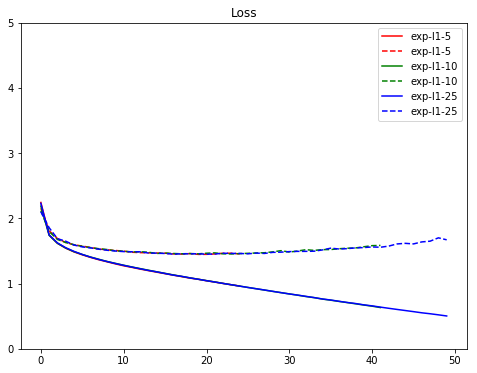

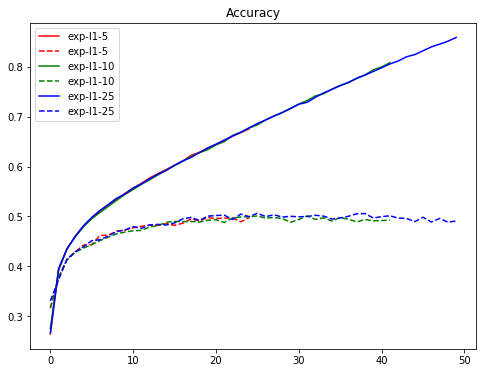

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k", "c"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()